# Fig. 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import xarray as xr 
import seaborn as sns
import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams.update({'font.size': 20})

import warnings
warnings.filterwarnings("ignore")



## Funtions 

In [2]:
def quantile_height(ds, var="Qpassive_1", quantile=0.05):
    """
    Calculates the height above which a specified quantile percentage of the given variable are located.
    Primarily used with 'Qpassive_1' to determine the injection height.

    Parameters:
    ds (xarray.Dataset): The dataset containing the variable of interest.
    var (str): The variable name to use for calculation (default is "Qpassive_1").
    quantile (float): The quantile value (e.g., 0.05 for 5%) to determine the height threshold (default is 0.05).

    Returns:
    xarray.DataArray: The minimum height where the specified quantile condition is met.
    """
    
    ds = ds.mean(("lat", "lon"))
    rho = dens(ds)
    dz = -1 * z.differentiate("height")
    qplume = ds[var] * rho.values * dz.values
    qplume_sum = qplume.cumsum(dim="height")
    qplume_100 = qplume_sum.max(dim="height")
    qplume_q = qplume_100 * quantile
    height_q = ds['height'].where(qplume_q < qplume_sum)
    height_q_min = height_q.min(dim="height")

    return height_q_min


def dens(d): 
    R = 287.1
    densitiy = d.pres / (R * d.temp)
    return densitiy

## Get Data

In [3]:
ds_freitas = xr.open_mfdataset("./freitas_heights.nc", engine = 'netcdf4')


In [4]:
data_path = "../data/"
dsref = xr.open_mfdataset(data_path + "exp_ref.nc", engine = 'netcdf4').isel(time = slice(2,None)).mean("time").squeeze()

z = xr.open_mfdataset("./height_info.nc").mean("time").squeeze().mean(("lat", "lon"))["z_mc"]
z = z.assign_coords(height=dsref.height)

In [5]:
#50
ds05 = xr.open_mfdataset(data_path + "exp_005.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds06 = xr.open_mfdataset(data_path + "exp_006.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds07 = xr.open_mfdataset(data_path + "exp_007.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds08 = xr.open_mfdataset(data_path + "exp_008.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
list50 = [ds05, ds06, ds07, ds08]
sh50 = [35, 40, 45, 50]


#75
ds10 = xr.open_mfdataset(data_path + "exp_010.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds11 = xr.open_mfdataset(data_path + "exp_011.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds12 = xr.open_mfdataset(data_path + "exp_012.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds13 = xr.open_mfdataset(data_path + "exp_013.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
list75 = [ds10, ds11, ds12, ds13]
sh75 = [52.5, 60, 67.5,75]


#100
ds14 = xr.open_mfdataset(data_path + "exp_014.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds15 = xr.open_mfdataset(data_path + "exp_015.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds16 = xr.open_mfdataset(data_path + "exp_016.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds17 = xr.open_mfdataset(data_path + "exp_017.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
list100 = [ds14, ds15, ds16, ds17]
sh100 = [70,80,90,100]


#150
ds18 = xr.open_mfdataset(data_path + "exp_018.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds19 = xr.open_mfdataset(data_path + "exp_019.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds20 = xr.open_mfdataset(data_path + "exp_020.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds21 = xr.open_mfdataset(data_path + "exp_021.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
list150 = [ds18, ds19, ds20, ds21]
sh150 = [105, 120, 135, 150]


#200
ds25 = xr.open_mfdataset(data_path + "exp_025.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds26 = xr.open_mfdataset(data_path + "exp_026.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds27 = xr.open_mfdataset(data_path + "exp_027.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
ds28 = xr.open_mfdataset(data_path + "exp_028.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze()
list200 = [ds25, ds26, ds27, ds28]
sh200 = [140, 160, 180, 200]

ds = ds05


## Prepare Plot

In [6]:
steps = ["30%","20%", "10%","0%"]
sets_names = [f"50$\,$kW$\,$m$^{{-2}}$" , f"75$\,$kW$\,$m$^{{-2}}$", f"100$\,$kW$\,$m$^{{-2}}$", f"150$\,$kW$\,$m$^{{-2}}$",f"200$\,$kW$\,$m$^{{-2}}$"]


colors = ["#e67410","#483D8B", "#B22222", "#2E8B57", "#fbc740"]

styles = ["o", "s", "<", "X"]
lstyles = ["-", "--"]
list_of_lists = [ list50, list75 ,list100, list150, list200]
list_of_fluxes = [sh50, sh75 ,sh100, sh150, sh200]

In [7]:
# Prepare Freitas Data
frflux = ds_freitas.sh_flux
frinj = ds_freitas.inj_h.values

# Get height values and corresponding pressure levels from the z dataset
height_values = z.values
pressure_levels = z.height.values

# Initialize an array to store the corresponding pressure levels for the injection heights
freitas_ph = np.empty(len(frinj))

# Function to find the nearest pressure level for a given height
def find_nearest_pressure_level(height, height_values, pressure_levels):
    # Calculate the absolute difference between the height and all available heights
    differences = np.abs(height_values - height)
    # Get the index of the minimum difference
    nearest_index = np.argmin(differences)
    # Return the corresponding pressure level
    return pressure_levels[nearest_index]

# Populate the array with the nearest pressure levels
for i, height in enumerate(frinj):
    freitas_ph[i] = find_nearest_pressure_level(height, height_values, pressure_levels)

# Optional: Print a summary or verify the output
print(f"Pressure levels for the given injection heights: {freitas_ph}")

Pressure levels for the given injection heights: [955.18859863 662.15881348 584.77197266 545.98156738 545.98156738
 507.45245361 507.45245361 469.36868286 422.64349365 422.64349365
 386.12341309 386.12341309 386.12341309 350.51376343 350.51376343
 315.93469238 315.93469238 315.93469238 315.93469238 282.48468018
 282.48468018 282.48468018 282.48468018 250.27389526 250.27389526
 250.27389526 250.27389526 250.27389526 219.42939758 219.42939758
 219.42939758 219.42939758 219.42939758 219.42939758 190.15652466
 190.15652466 190.15652466 190.15652466 190.15652466 162.75521851
 162.75521851]


## Plot Figure

In [8]:
# Set some variables for the plot
q1 = 0.05
q2 = 0.5
quantiles = [q1, q2]
quantiles_label = ["Injection height", "Median height"]
handles_legend2 = []
y_ticks = [ 800, 700, 600, 500, 400, 300, 200]

Done with set: 0
Done with set: 1
Done with set: 2
Done with set: 3
Done with set: 4


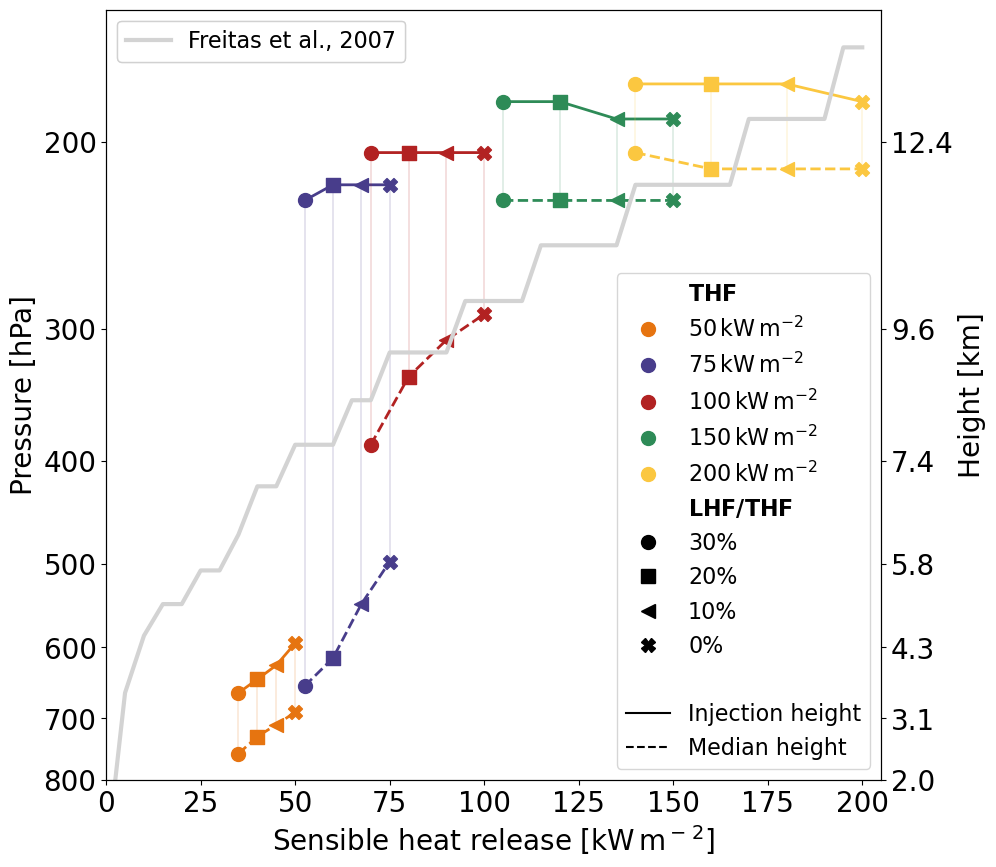

In [9]:
count = 0
fig, ax = plt.subplots(1, figsize=[10, 10])

# Loop through sets
for i, iset in enumerate(list_of_lists):
    sh_list = list_of_fluxes[i]

    quants1 = []
    quants2 = []
    # Calculate Injcection heights
    for j, ds in enumerate(iset):
        quants1 = np.append(quants1, quantile_height(ds.mean("time"), quantile=q1))
        quants2 = np.append(quants2, quantile_height(ds.mean("time"), quantile=q2))
        ax.scatter(sh_list[j], quants1[j], color=colors[i], marker=styles[j], s=100)
        ax.scatter(sh_list[j], quants2[j],  color=colors[i], marker=styles[j], s=100)
        ax.vlines(sh_list[j], ymin=quantile_height(ds.mean("time"), quantile=q1), ymax=quantile_height(ds.mean("time"), quantile=q2), colors=colors[i], linewidths = 0.2)
        count += 1
    
    
    ax.plot(sh_list, quants1, color = colors[i], linewidth = 2 )
    ax.plot(sh_list, quants2, color = colors[i], linewidth = 2 , linestyle = "--")
    
    print("Done with set: " + str(i))    

# Plot Freitas
freitas = ax.plot(frflux,freitas_ph, linewidth = 3, color = "lightgrey")    
handles_legend2.append(freitas)

# Make Axis nice
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks)
ax.set_ylim(800, 150)
ax.set_xlim(0, 205)
ax.set_xlabel(f"Sensible heat release [kW$\,$m$^-$$^2$]")
ax.set_ylabel(f"Pressure [hPa]")


# Create legend handles for colors
color_handles = [mlines.Line2D([], [], color=color, marker='o', linestyle='None', markersize=10, label=sets_names[i]) for i, color in enumerate(colors)]
# Create legend handles for marker styles
style_handles = [mlines.Line2D([], [], color='black', marker=style, linestyle='None', markersize=10, label=steps[j]) for j, style in enumerate(styles)]
line_handles  = [mlines.Line2D([], [], color='black', marker='None', linestyle=lstyle, markersize=10, label=quantiles_label[k]) for k, lstyle in enumerate(lstyles)]
# Set Titels for the Legend
color_title_handle = mlines.Line2D([], [], color='none', marker='', linestyle='None', label= r'$\bf{THF}$')
style_title_handle = mlines.Line2D([], [], color='none', marker='', linestyle='None', label=r'$ \bf{LHF} / \bf{THF}$')
line_title_handle = mlines.Line2D([], [], color='none', marker='', linestyle='None', label= r'$\bf{}}$')
# Put Legend together
handles = [color_title_handle] + color_handles + [style_title_handle] + style_handles + [line_title_handle] + line_handles

# Add legends to the plot
legend1 = ax.legend(handles=handles, loc='lower right', fontsize = 16)
ax.add_artist(legend1)
# Add second legend
legend2 = ax.legend(handles=freitas, labels=["Freitas et al., 2007"], loc='upper left', fontsize = 16)
ax.add_artist(legend2)

# Add Second y-Axis
ax2 = ax.twinx()
ax2.invert_yaxis()
ax2.set_yscale("log")
ax2.set_yticks(y_ticks)
ax2.set_yticklabels(np.round((0.001*z.sel(height = y_ticks, method = "nearest").values),1))
ax2.set_ylim(800, 150)
ax2.set_ylabel(f"Height [km]")

# Save the figure
my_path = "./figs/"
fig.savefig(my_path + 'fig08.png', dpi=300, bbox_inches='tight')
fig.savefig(my_path + 'fig08_lq.png', dpi=50, bbox_inches='tight')
